In [74]:
import os
from pathlib import Path

In [38]:
d = Path("../Datasets/images/")

In [39]:
image_data = []
labels = []

labels2dir = {"cats": 0, "dogs": 1, "horses": 2}

In [40]:
# from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt

In [41]:
import pandas as pd

In [42]:
import numpy as np

In [43]:
folders = d.glob("*")

for folder_path in folders:
    # print(folder_path)
    l = str(folder_path).split("\\")[-1]

    if l != "humans":
        images_dir = folder_path.glob("*.jpg")
        
        for image_path in images_dir:
            image = cv2.imread(str(image_path))
            cvt_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            cvt_image = cv2.resize(cvt_image, (50, 50))
            
            ## for MLP (neural network) flattening the image is not necessary 
            image_data.append(cvt_image)
            labels.append(labels2dir[l])
            

In [44]:
# shuffle image data since the bottom row have same animal images

import random

In [45]:
image_labels = list(zip(image_data, labels))

random.shuffle(image_labels)

image_data, labels = zip(*image_labels)
image_data, labels = np.array(image_data), np.array(labels)

In [46]:
print(image_data.shape, labels.shape)

(606, 50, 50, 3) (606,)


In [47]:
type(labels)

numpy.ndarray

In [48]:
labels

array([1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0,
       1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0,
       0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0,
       0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2,

In [49]:
# flatten to image to 1D array for easy fed into MLP - not necessary
image_data = image_data.reshape((image_data.shape[0], -1))

In [50]:
# normalizing data to avoid overflow of exp(Z3)
image_data = image_data/255.0

In [51]:
image_data.shape

(606, 7500)

### train test split and visualize images

In [52]:
split = int(0.8 * image_data.shape[0])

In [53]:
# training set
X = image_data[:split]
Y = labels[:split]

# testing set
Xt = image_data[split:]
Yt = labels[split:]

In [54]:
print(X.shape, Y.shape)
print(Xt.shape, Yt.shape)

(484, 7500) (484,)
(122, 7500) (122,)


In [55]:
Y

array([1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0,
       1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0,
       1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0,
       0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0,
       0, 0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0,
       0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 0,
       2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 0, 0,
       2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2,

In [56]:
### Now we have training data (X, Y) and testing data

In [57]:
def one_hot(Y, classes):
    no_of_images = Y.shape[0]
    Y_oht = np.zeros((no_of_images, classes))
    
    Y_oht[np.arange(no_of_images), Y] = 1
    return Y_oht

# mean square error (MSE) cost/error/loss function
def mse(Yoht, Y_):
    l = np.mean(np.square(Y_ - Yoht), axis=1)
    return l

# cross entropy loss function
def crs_etrp(Yoht, Y_):
    l = -np.mean(Yoht * np.log(Y_))
    return l

# activation function
def relu(z):
    z[z <= 0] = 0
    return z

# probablity
def softmax(p):
    p = p - np.max(p)
    exp_p = np.exp(p)
    total = np.sum(exp_p, axis=1, keepdims=True)
    return exp_p/total

# derivative of relu
def der_relu(a):
    a[a > 0] = 1
    return a

# derivative of tanh
def der_tanh(a):
    der = 1 - np.square(a)
    return der

In [58]:
Yoht = one_hot(Y, 3)

In [59]:
mse(Yoht, 1).shape

(484,)

In [60]:
Yoht.shape

(484, 3)

In [195]:
class MLP:
    # this mlp uses relu activation function, mse loss function and SGD optimization algorithm
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        np.random.seed(0)
        
        model = {}
        
        model['W1'] = np.random.rand(input_neurons, hidden_neurons[0])
        model['B1'] = np.zeros((1, hidden_neurons[0]))
        
        model['W2'] = np.random.rand(hidden_neurons[0], hidden_neurons[1])
        model['B2'] = np.zeros((1, hidden_neurons[1]))
        
        #output layer
        model['W3'] = np.random.rand(hidden_neurons[1], output_neurons)
        model['B3'] = np.zeros((1, output_neurons))
        
        self.model = model
        
    def feedForward(self, X):
        
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        B1, B2, B3 = self.model['B1'], self.model['B2'], self.model['B3']
        
        Z1 = np.dot(X, W1) + B1
        A1 = np.tanh(Z1)
        
        Z2 = np.dot(A1, W2) + B2
        A2 = np.tanh(Z2)
        
        Z3 = np.dot(A2, W3) + B3
        Y_ = softmax(Z3)
        
        self.activations = (A1, A2, Y_)
        
        return Y_
        
    def backProp(self, X, Y, learning_rate=0.001):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        B1, B2, B3 = self.model['B1'], self.model['B2'], self.model['B3']
        A1, A2, Y_ = self.activations
        
        m = X.shape[0] #  no of samples
        
        delta3 = Y_ - Y
        # derviative of loss
        dW3 = np.dot(A2.T, delta3)
        dB3 = np.sum(delta3, axis=0)/float(m)
        
        delta2 = der_tanh(A2) * np.dot(delta3, W3.T)
        dW2 = np.dot(A1.T, delta2)
        dB2 = np.sum(delta2, axis=0)
        
        delta1 = der_tanh(A1) * np.dot(delta2, W2.T)
        dW1 = np.dot(X.T, delta1)
        dB1 = np.sum(delta1, axis=0)
        
        self.model['W1'] -= learning_rate*dW1
        self.model['B1'] -= learning_rate*dB1
        
        self.model['W2'] -= learning_rate*dW2
        self.model['B2'] -= learning_rate*dB2
        
        # updating weights and biases
        self.model['W3'] -= learning_rate*dW3
        self.model['B3'] -= learning_rate*dB3
        
    def predict(self, X):
        pred_out = self.feedForward(X)
        print(pred_out)
        return np.argmax(pred_out, axis=1)
    
    
    def summary(self):
        W1, W2, W3 = self.model['W1'], self.model['W2'], self.model['W3']
        B1, B2, B3 = self.model['B1'], self.model['B2'], self.model['B3']
        
        A1, A2, Y_ = self.activations
        
        print("W1", W1.shape)
        print("A1", A1.shape)
        
        print("W2", W2.shape)
        print("A2", A2.shape)
        
        print("W3", W3.shape)
        print("pred_outputs", Y_.shape)

In [196]:
# training our model

def train(X, Y, model, epochs, learning_rate=0.001, logs=True):
    training_loss = []
    W = []
    
    classes = 3
    Y_oht = one_hot(Y, classes)
    
    for i in range(epochs):
        model.feedForward(X)
        A1, A2, Y_ = model.activations
        loss = crs_etrp(Y_oht, Y_)
        
        training_loss.append(loss)
        
        model.backProp(X, Y_oht, learning_rate)
        
        if(logs):
            print("Epochs %d Loss %.4f"%(i, loss), end="\r")
            
    return training_loss

In [197]:
my_mlp = MLP(X.shape[1], [10, 5], np.unique(Y).size)

loss_list = train(X, Y, my_mlp, 100, learning_rate=0.00005)

<ipython-input-198-3cefdadbe896>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


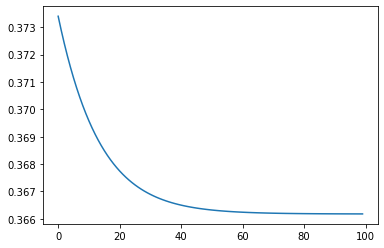

In [198]:
plt.plot(loss_list)
plt.show()

In [123]:
from sklearn.metrics import classification_report

In [157]:
a, b, Y_ = my_mlp.activations

In [158]:
Y_ = np.argmax(Y_, axis=1)

In [161]:
print(classification_report(Y_, Y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.34      0.51       484

    accuracy                           0.34       484
   macro avg       0.33      0.11      0.17       484
weighted avg       1.00      0.34      0.51       484



In [146]:
Y.shape

(484,)

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [168]:
matrix = confusion_matrix(Y, Y_)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [0, 1, 2])

In [201]:
Y_ = my_mlp.predict(X)

[[0.32672364 0.33386346 0.33941291]
 [0.32672364 0.33386346 0.33941291]
 [0.32672364 0.33386346 0.33941291]
 ...
 [0.32672364 0.33386346 0.33941291]
 [0.32672364 0.33386346 0.33941291]
 [0.32672364 0.33386346 0.33941291]]


In [194]:
Y_.

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [192]:
Y_.shape

()

<ipython-input-169-f84fc7d31b65>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


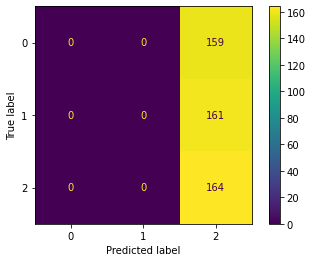

In [169]:
cm_display.plot()
plt.show()

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,